In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\HP\Desktop\Python\Vs_Python\Projects\Crop_recommandation\Notebook\Crop_recommendation.csv')

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.shape

(2200, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
data['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [9]:
nf= data.select_dtypes(include=['int','float']).columns.tolist()

In [10]:
corrrr = data[nf].corr()

<Axes: >

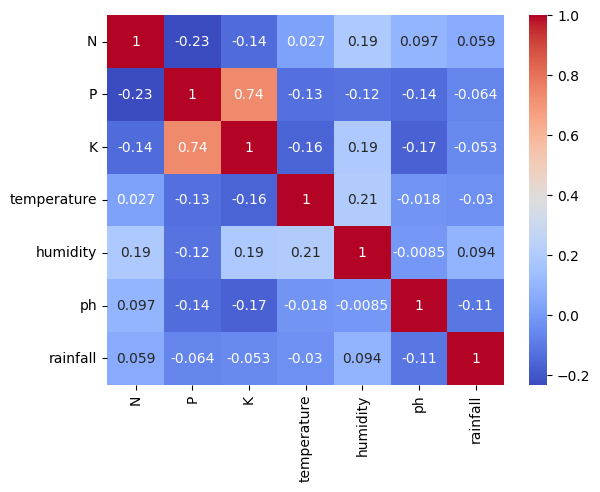

In [11]:
sns.heatmap(data = corrrr, cmap = 'coolwarm', annot = True)

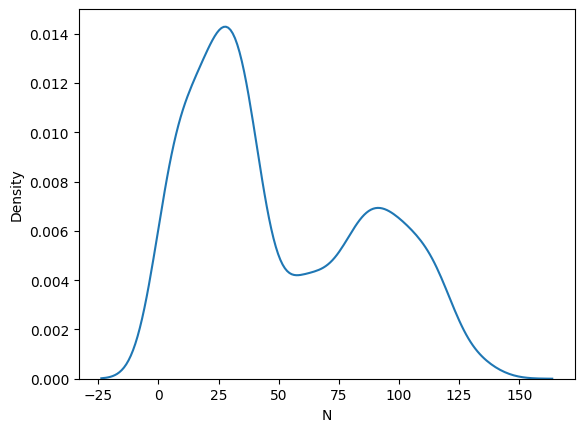

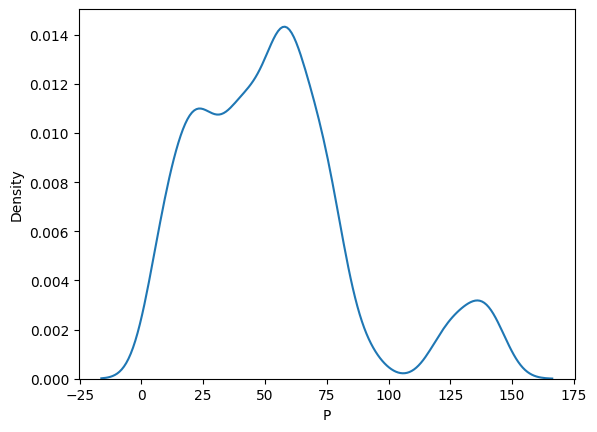

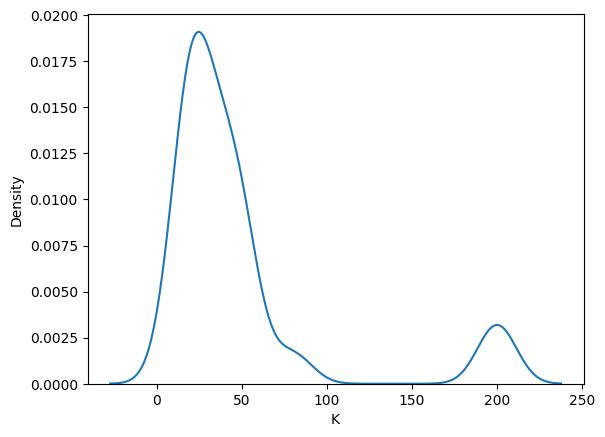

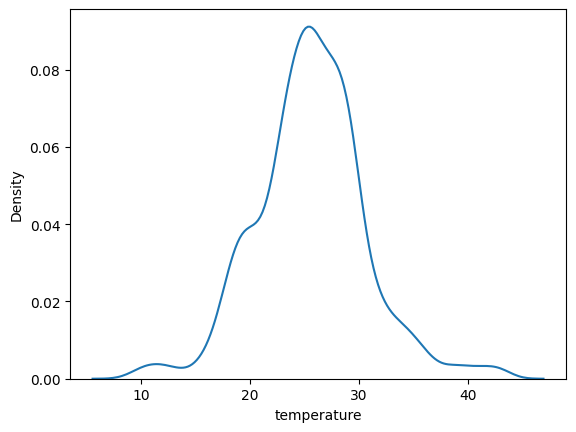

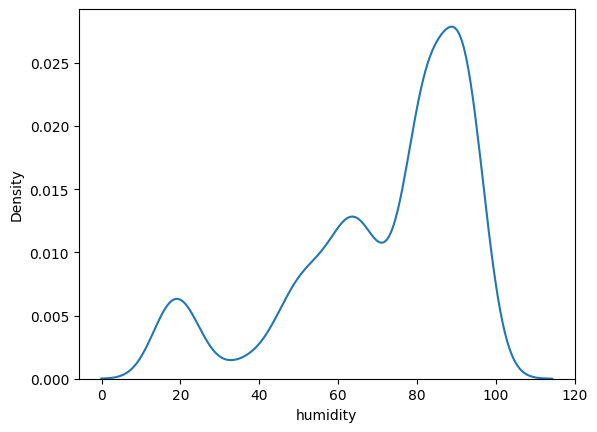

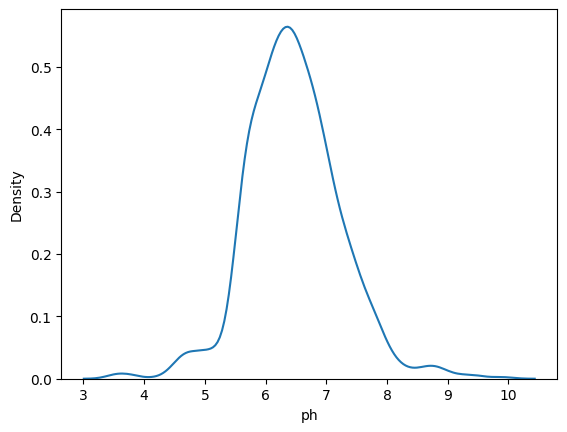

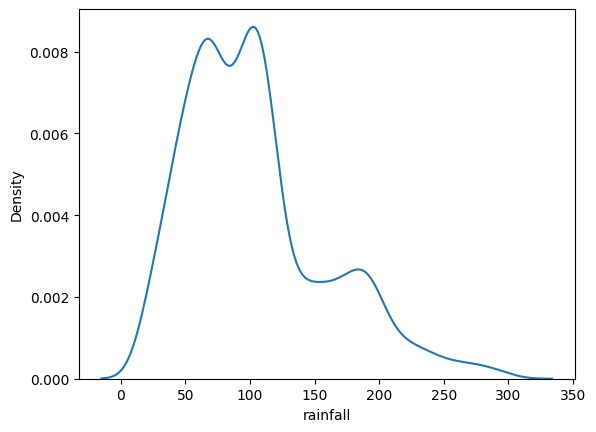

In [12]:
for i in nf:
    sns.kdeplot(data=data, x=i)
    plt.show()

In [13]:
from scipy.stats import skew
for i in nf:
    skew_data = data[i].skew()
    print(f"For {i} the skew: {skew_data}")

For N the skew: 0.5097213691539147
For P the skew: 1.0107725431372674
For K the skew: 2.3751672388547
For temperature the skew: 0.18493273421137887
For humidity the skew: -1.0917079195808679
For ph the skew: 0.2839294375729441
For rainfall the skew: 0.9657563536272812


In [ ]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

right_skew_cols = ['N','P', 'K', 'rainfall']

# Create a copy
df_transformed = data.copy()

# Initialize PowerTransformer (Yeo-Johnson works with zero & negative values; Box-Cox only with positive)
pt = PowerTransformer(method='yeo-johnson')  

# Fit and transform the right-skewed columns
df_transformed[right_skew_cols] = pt.fit_transform(df_transformed[right_skew_cols])

# Check skewness after transformation
after_skew = pd.Series(df_transformed[right_skew_cols].skew(), index=right_skew_cols)
print("Skewness after power transformation:\n", after_skew)


Skewness after power transformation:
 N          -0.129744
P          -0.027591
K          -0.022226
rainfall   -0.012990
dtype: float64


In [46]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Columns to handle (excluding N, P, K, rainfall)
cols_to_handle = ['humidity']

# Apply PowerTransformer (Yeo-Johnson handles negative/zero values and left skew)
pt = PowerTransformer(method='yeo-johnson')
df_transformed[cols_to_handle] = pt.fit_transform(df_transformed[cols_to_handle])

# Check skewness after transformation
after_skew = pd.Series(df_transformed[cols_to_handle].skew(), index=cols_to_handle)
print("Skewness after transformation:\n", after_skew)


Skewness after transformation:
 humidity   -0.466314
dtype: float64


In [47]:
df_transformed

,N,P,K,temperature,humidity,ph,rainfall,label
0,1.051047,-0.169541,0.430166,20.879744,0.405334,6.502985,1.572569,20
1,0.960517,0.328412,0.366477,21.770462,0.300993,7.038096,1.815966,20
2,0.453737,0.242156,0.460529,23.004459,0.425326,7.840207,2.160912,20
3,0.749884,-0.424458,0.333035,26.491096,0.291124,6.980401,1.970950,20
4,0.828446,-0.169541,0.398834,20.130175,0.380446,7.628473,2.150027,20
...,...,...,...,...,...,...,...,...
2195,1.338761,-0.463341,0.017445,26.774637,-0.467769,6.780064,1.288484,5
2196,1.206941,-1.395097,-0.239543,27.417112,-0.910316,6.086922,0.615847,5
2197,1.511006,-0.502927,-0.078439,24.131797,-0.427420,6.362608,1.234961,5
2198,1.495743,-0.543248,0.105607,26.272418,-1.087767,6.758793,0.604262,5


In [48]:
df = df_transformed.copy()

In [49]:
numerical_feature = df.select_dtypes(include=['int','float']).columns.tolist()

In [50]:
n_carr = df[numerical_feature].corr()

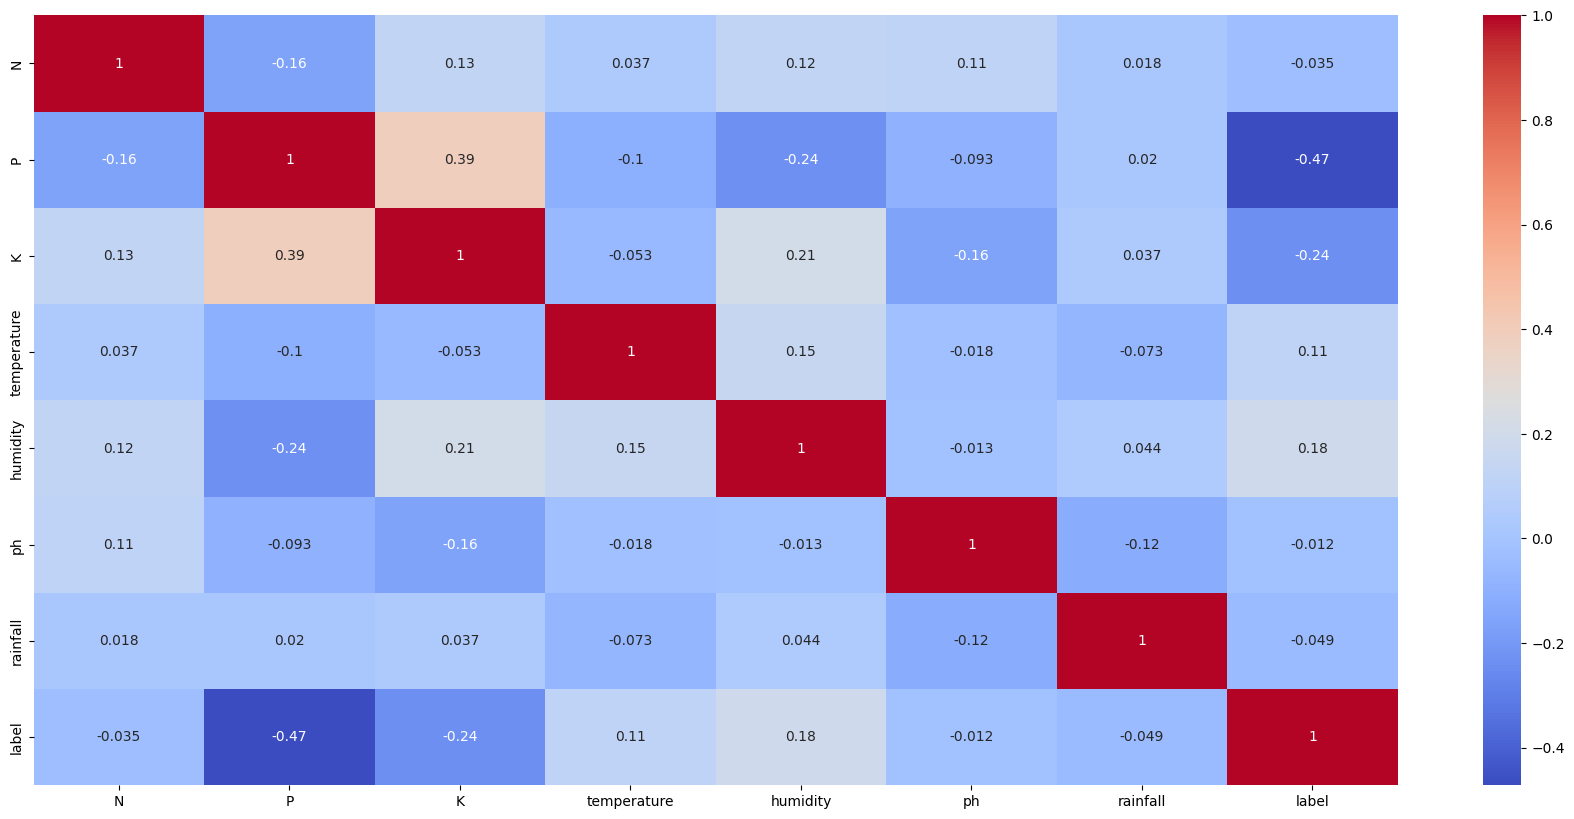

In [51]:
plt.figure(figsize=(22,10))
sns.heatmap(data=n_carr,cmap = 'coolwarm', annot = True)
plt.show()

In [52]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['label'] = LE.fit_transform(data['label'])

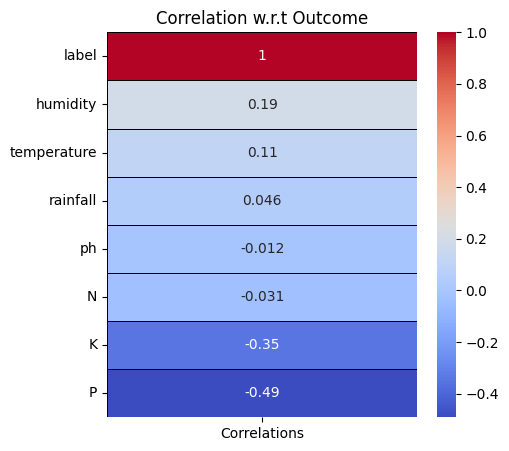

In [53]:
corr = data.corrwith(data['label']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [57]:
X = df.drop(columns=['label'])
y = df['label']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC':SVC(),
    'GaussianNB':GaussianNB(),
    'BernoulliNB':BernoulliNB(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'ExtraTreesClassifier':ExtraTreesClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'XGBClassifier':XGBClassifier(),
    'CatBoostClassifier':CatBoostClassifier(verbose=0)}

In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}

    for name, model in models.items():
        print(f"\n🔹 Training {name}...")
        
        # Train
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        print(f"✅ Accuracy: {acc:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
        disp.plot(cmap="Purples")
        plt.title(f"Confusion Matrix - {name}")
        plt.show()

        # Save results
        results[name] = acc
    
    return results



🔹 Training LogisticRegression...


c:\Users\HP\Desktop\Python\Vs_Python\Projects\Crop_recommandation\CC_venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Accuracy: 0.9614


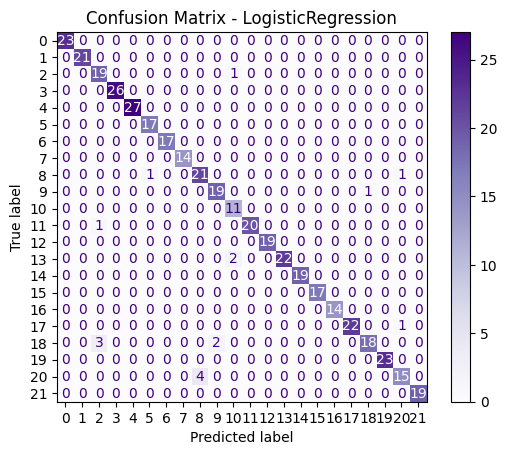


🔹 Training KNeighborsClassifier...
✅ Accuracy: 0.9409


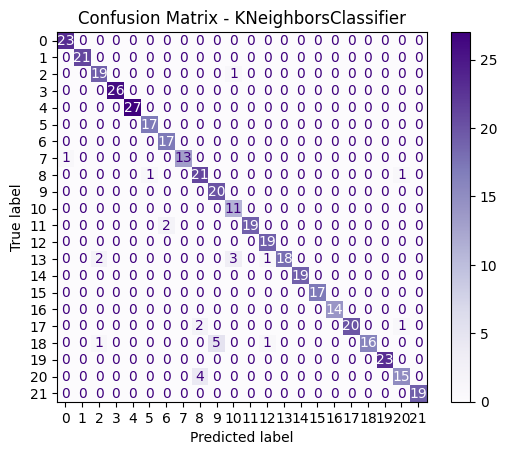


🔹 Training SVC...
✅ Accuracy: 0.7000


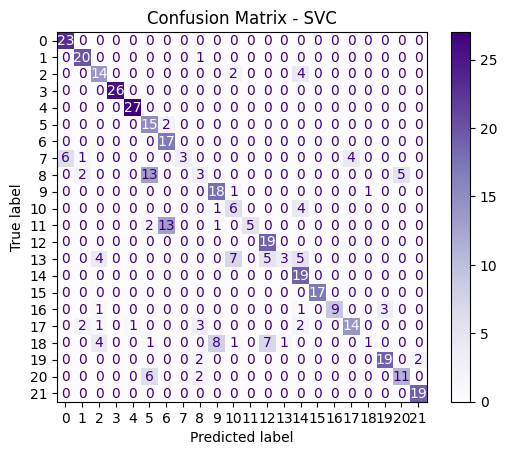


🔹 Training GaussianNB...
✅ Accuracy: 0.9955


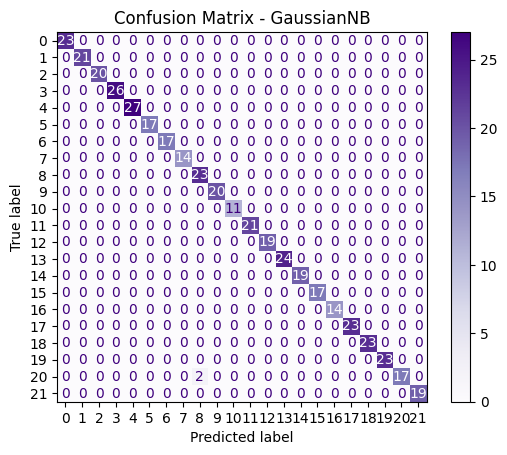


🔹 Training BernoulliNB...
✅ Accuracy: 0.6341


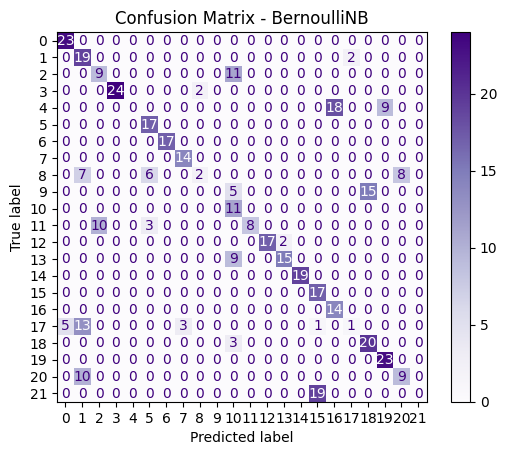


🔹 Training DecisionTreeClassifier...
✅ Accuracy: 0.9818


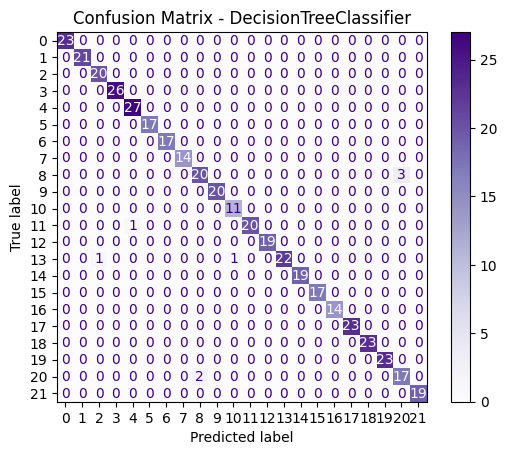


🔹 Training RandomForestClassifier...
✅ Accuracy: 0.9932


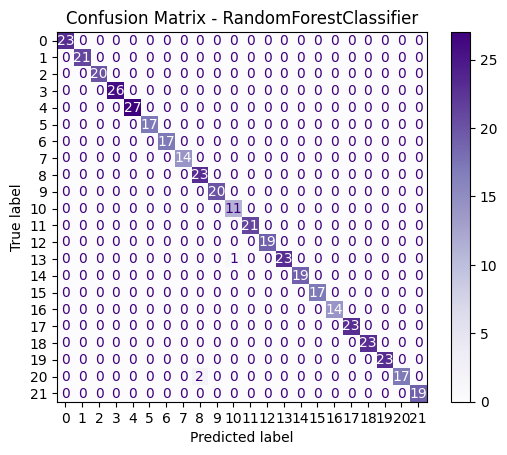


🔹 Training ExtraTreesClassifier...
✅ Accuracy: 0.9909


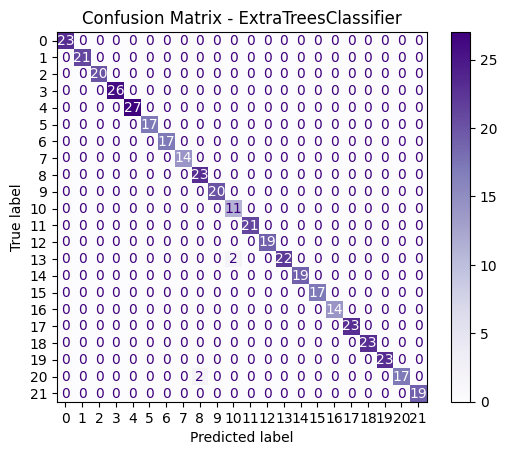


🔹 Training GradientBoostingClassifier...
✅ Accuracy: 0.9818


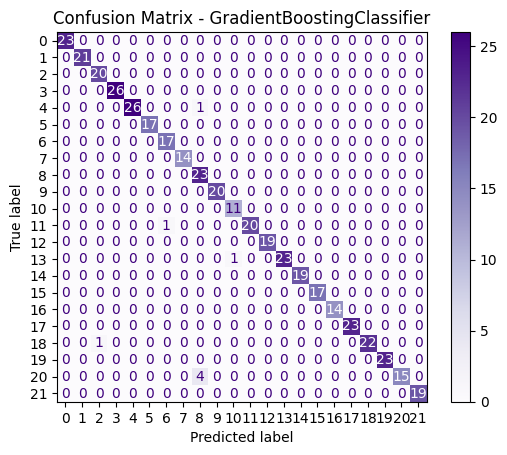


🔹 Training AdaBoostClassifier...
✅ Accuracy: 0.1455


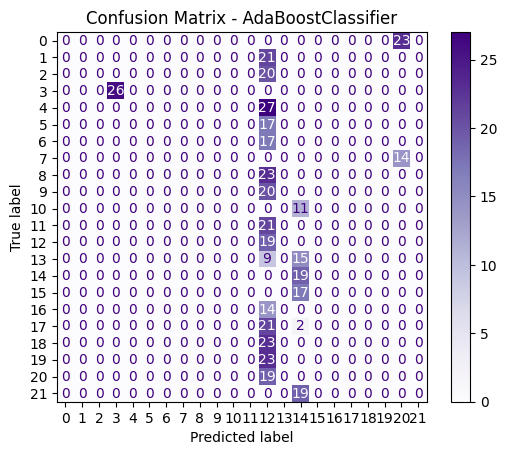


🔹 Training BaggingClassifier...
✅ Accuracy: 0.9932


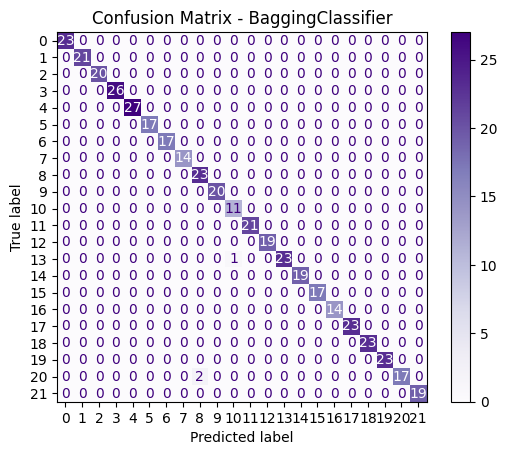


🔹 Training XGBClassifier...
✅ Accuracy: 0.9864


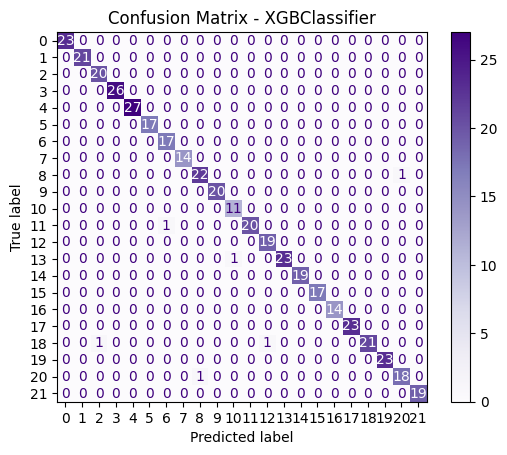


🔹 Training CatBoostClassifier...
✅ Accuracy: 0.9886


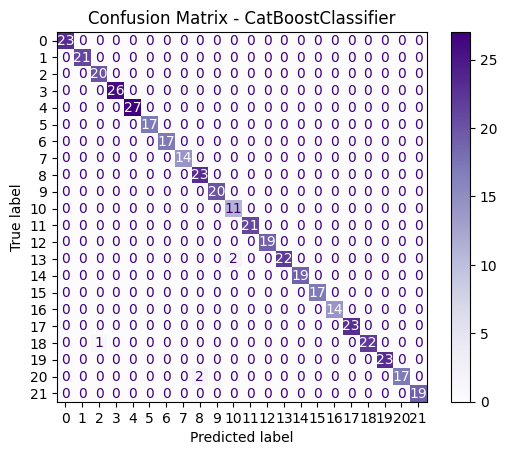


📌 Model Accuracies:
{'LogisticRegression': 0.9613636363636363, 'KNeighborsClassifier': 0.9409090909090909, 'SVC': 0.7, 'GaussianNB': 0.9954545454545455, 'BernoulliNB': 0.634090909090909, 'DecisionTreeClassifier': 0.9818181818181818, 'RandomForestClassifier': 0.9931818181818182, 'ExtraTreesClassifier': 0.990909090909091, 'GradientBoostingClassifier': 0.9818181818181818, 'AdaBoostClassifier': 0.14545454545454545, 'BaggingClassifier': 0.9931818181818182, 'XGBClassifier': 0.9863636363636363, 'CatBoostClassifier': 0.9886363636363636}


In [96]:
results = evaluate_models(models, X_train, X_test, y_train, y_test)
print("\n📌 Model Accuracies:")
print(results)
